# EXPLORATORY DATA ANALYSIS ON POPULAR MOVIE GENRE


### This project is about an exploratory data analysis on popular movie genre, commencing with web scraping for data collection, followed by data cleaning, and concluding with data analysis through visualization. 


### The objective is to identify patterns and trends in movie preferences among audiences. 

## Web Scraping

In [137]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [138]:
urls = 'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page='
page = requests.get(urls)
page

<Response [200]>

In [139]:
page.text

'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 500 - Greatest Movies of All Time! - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="canonical" href="https://www.imdb.com/list/ls050

In [140]:
soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 500 - Greatest Movies of All Time! - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls050782187/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls050782187/" property="og:url"/>
<script>
    if (typeof uet

In [141]:
soup.find_all("h1")

[<h1 class="header list-name">Top 500 - Greatest Movies of All Time!</h1>]

In [142]:
soup.find_all("h1")[0].text   

'Top 500 - Greatest Movies of All Time!'

In [143]:
type(soup.find_all("h1"))

bs4.element.ResultSet

In [144]:
len(soup.find_all("h1"))

1

In [145]:
soup.find_all("h3",class_="lister-item-header")

[<h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0068646/">The Godfather</a>
 <span class="lister-item-year text-muted unbold">(1972)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">2.</span>
 <a href="/title/tt0102926/">The Silence of the Lambs</a>
 <span class="lister-item-year text-muted unbold">(1991)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">3.</span>
 <a href="/title/tt0080684/">Star Wars: Episode V - The Empire Strikes Back</a>
 <span class="lister-item-year text-muted unbold">(1980)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">4.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary"

In [146]:
len(soup.find_all("h3",class_="lister-item-header"))

100

In [147]:
p = soup.find_all("h3",class_="lister-item-header")
movies = []
for i in p:
    movies.append(i.text)

In [148]:
movies

['\n1.\nThe Godfather\n(1972)\n',
 '\n2.\nThe Silence of the Lambs\n(1991)\n',
 '\n3.\nStar Wars: Episode V - The Empire Strikes Back\n(1980)\n',
 '\n4.\nThe Shawshank Redemption\n(1994)\n',
 '\n5.\nThe Shining\n(1980)\n',
 '\n6.\nCasablanca\n(1942)\n',
 "\n7.\nOne Flew Over the Cuckoo's Nest\n(1975)\n",
 '\n8.\nRaiders of the Lost Ark\n(1981)\n',
 '\n9.\nThe Lord of the Rings: The Return of the King\n(2003)\n',
 '\n10.\nStar Wars\n(1977)\n',
 '\n11.\nThe Dark Knight\n(2008)\n',
 '\n12.\nThe Godfather Part II\n(1974)\n',
 '\n13.\nAliens\n(1986)\n',
 "\n14.\nSchindler's List\n(1993)\n",
 '\n15.\nInception\n(2010)\n',
 '\n16.\nThe Lord of the Rings: The Fellowship of the Ring\n(2001)\n',
 '\n17.\nAlien\n(1979)\n',
 '\n18.\nSome Like It Hot\n(1959)\n',
 '\n19.\nBlade Runner\n(1982)\n',
 '\n20.\nSe7en\n(1995)\n',
 '\n21.\nApocalypse Now\n(1979)\n',
 '\n22.\n12 Angry Men\n(1957)\n',
 '\n23.\nThe Lord of the Rings: The Two Towers\n(2002)\n',
 '\n24.\nTerminator 2: Judgment Day\n(1991)\n',
 '

In [149]:
movie_name=[]
year=[]
certificate=[]
time=[]
genre=[]
rating=[]
directors=[]
stars=[]
metascore=[]
votes=[]
gross=[]

for i in range(1,6):
    urls="https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page="+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    for i in soup.find_all("h3",class_="lister-item-header"):
        movie_name.append(i.text.split("\n")[2])


    for i in soup.find_all("h3",class_="lister-item-header"):
                year.append(i.text.split("\n")[3].split("(")[1].split(")")[0].replace("TV Movie",""))
    
        
    for i in soup.find_all("span","runtime"):
        time.append(i.text.split()[0])


    for i in soup.find_all("span",class_="genre"):
        genre.append(i.text.strip())



    for i in soup.find_all("div",class_="ipl-rating-star small"):
            rating.append(i.text.replace("\n",""))


    for i in soup.find_all("p",class_="text-muted text-small")[1::3]:
        directors.append(i.text.split(":")[1].split("|")[0].replace("\n",""))


    for i in  soup.find_all("p",class_="text-muted text-small")[1::3]:
        stars.append(i.text.split(":")[2].replace("\n",""))



    for i in soup.find_all("div",class_="lister-item-content"):

        if i.find("span",class_="metascore"): 
            meta=i.find("span",class_="metascore").text.replace(" ","") 
            metascore.append(meta)
        else:
            (metascore.append(np.nan))

        if i.find("span",class_="certificate"):
            cer=i.find("span",class_="certificate").text
            certificate.append(cer)
        else:
            certificate.append(np.nan)

        value= i.find_all("span",attrs={"name":"nv"})
        v=value[0].text
        votes.append(v)

        if len(value)>1:
            grosses=value[1].text.replace("$","").replace("M","") 
            gross.append(grosses)
        else:
            gross.append(np.nan)

movie_release_year=[]            

for x in year: 
    if x=="I":
        movie_release_year.append(np.nan)
    else:
        movie_release_year.append(x)            
            
            
print(len(movie_name))
print(len(movie_release_year))
print(len(time))
print(len(genre))
print(len(rating))
print(len(metascore))
print(len(certificate))
print(len(directors))
print(len(stars))
print(len(votes))
print(len(gross))

https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=1
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=2
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=3
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=4
https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=5
500
500
500
500
500
500
500
500
500
500
500


### Creating Dataframe

In [152]:
movies=pd.DataFrame({"Movie Name":movie_name,
                "Release year":movie_release_year,
                 "Certificate":certificate,
                 "Runtime":time,
                 "Genre":genre,
                "Rating":rating,
                 "Metascore":metascore,
                "Directors":directors,
                "Stars":stars,
                "Votes":votes,
                 "Gross":gross
                })

In [153]:
movies.to_csv('movies.csv')

In [154]:
movies

Movie Name Release year Certificate  \
0                                     The Godfather         1972           A   
1                          The Silence of the Lambs         1991           A   
2    Star Wars: Episode V - The Empire Strikes Back         1980          UA   
3                          The Shawshank Redemption         1994           A   
4                                       The Shining         1980           A   
..                                              ...          ...         ...   
495                              Me, Myself & Irene         2000           A   
496                          The Darjeeling Limited         2007           R   
497                                            Fear         1996   Not Rated   
498                                   Planet Terror         2007           A   
499                                     The Descent         2005           A   

    Runtime                        Genre Rating Metascore  \
0       175                 Crime, Drama    9.2       100   
1       118       Crime, Drama, Thriller    8.6        86   
2       124   Action, Adventure, Fantasy    8.7        82   
3       142                        Drama    9.3        82   
4       146                Drama, Horror    8.4        66   
..      ...                          ...    ...       ...   
495     116                       Comedy    6.6        49   
496      91     Adventure, Comedy, Drama    7.2        67   
497      97              Drama, Thriller    6.2        51   
498     105       Action, Comedy, Horror      7       NaN   
499      99  Adventure, Horror, Thriller    7.2        71   

                          Directors  \
0              Francis Ford Coppola   
1                    Jonathan Demme   
2                    Irvin Kershner   
3                    Frank Darabont   
4                   Stanley Kubrick   
..                              ...   
495  Bobby Farrelly, Peter Farrelly   
496                    Wes Anderson   
497                     James Foley   
498                Robert Rodriguez   
499                   Neil Marshall   

                                                 Stars      Votes   Gross  
0    Marlon Brando, Al Pacino, James Caan, Diane Ke...  1,980,657  134.97  
1    Jodie Foster, Anthony Hopkins, Scott Glenn, Te...  1,521,664  130.74  
2    Mark Hamill, Harrison Ford, Carrie Fisher, Bil...  1,360,467  290.48  
3    Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  2,842,667   28.34  
4    Jack Nicholson, Shelley Duvall, Danny Lloyd, S...  1,089,320   44.02  
..                                                 ...        ...     ...  
495  Jim Carrey, Renée Zellweger, Anthony Anderson,...    248,733   90.57  
496  Owen Wilson, Adrien Brody, Jason Schwartzman, ...    214,507   11.90  
497  Mark Wahlberg, Reese Witherspoon, William Pete...     52,782   20.75  
498  Rose McGowan, Freddy Rodríguez, Josh Brolin, M...    221,136     NaN  
499  Shauna Macdonald, Natalie Mendoza, Alex Reid, ...    242,973   26.02  

[500 rows x 11 columns]

In [157]:
df=movies.copy()

In [158]:
df.head()

Movie Name Release year Certificate  \
0                                   The Godfather         1972           A   
1                        The Silence of the Lambs         1991           A   
2  Star Wars: Episode V - The Empire Strikes Back         1980          UA   
3                        The Shawshank Redemption         1994           A   
4                                     The Shining         1980           A   

  Runtime                       Genre Rating Metascore             Directors  \
0     175                Crime, Drama    9.2       100  Francis Ford Coppola   
1     118      Crime, Drama, Thriller    8.6        86        Jonathan Demme   
2     124  Action, Adventure, Fantasy    8.7        82        Irvin Kershner   
3     142                       Drama    9.3        82        Frank Darabont   
4     146               Drama, Horror    8.4        66       Stanley Kubrick   

                                               Stars      Votes   Gross  
0  Marlon Brando, Al Pacino, James Caan, Diane Ke...  1,980,657  134.97  
1  Jodie Foster, Anthony Hopkins, Scott Glenn, Te...  1,521,664  130.74  
2  Mark Hamill, Harrison Ford, Carrie Fisher, Bil...  1,360,467  290.48  
3  Tim Robbins, Morgan Freeman, Bob Gunton, Willi...  2,842,667   28.34  
4  Jack Nicholson, Shelley Duvall, Danny Lloyd, S...  1,089,320   44.02

In [159]:
df.shape

(500, 11)

### Data Cleaning

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    500 non-null    object
 1   Release year  481 non-null    object
 2   Certificate   476 non-null    object
 3   Runtime       500 non-null    object
 4   Genre         500 non-null    object
 5   Rating        500 non-null    object
 6   Metascore     491 non-null    object
 7   Directors     500 non-null    object
 8   Stars         500 non-null    object
 9   Votes         500 non-null    object
 10  Gross         480 non-null    object
dtypes: object(11)
memory usage: 43.1+ KB


In [163]:
df.isnull().sum()

Movie Name       0
Release year    19
Certificate     24
Runtime          0
Genre            0
Rating           0
Metascore        9
Directors        0
Stars            0
Votes            0
Gross           20
dtype: int64

In [168]:
df["Certificate"]=df["Certificate"].fillna("Not Certified")
df["Metascore"]=df["Metascore"].fillna(0)
df["Gross"]=df["Gross"].fillna(df["Gross"].median())

In [169]:
df.dropna(inplace=True)

In [170]:
df.isnull().sum()

Movie Name      0
Release year    0
Certificate     0
Runtime         0
Genre           0
Rating          0
Metascore       0
Directors       0
Stars           0
Votes           0
Gross           0
dtype: int64

In [171]:
df["Votes"] = df["Votes"].astype(str).str.replace(",", "")

In [175]:
df["Runtime"]=df["Runtime"].astype("int")
df["Rating"]=df["Rating"].astype("float")
df["Metascore"]=df["Metascore"].astype("int")
df["Release year"]=df["Release year"].astype("int")
df["Votes"]=df["Votes"].astype("int")
df["Gross"]=df["Gross"].astype("float")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    481 non-null    object 
 1   Release year  481 non-null    int32  
 2   Certificate   481 non-null    object 
 3   Runtime       481 non-null    int32  
 4   Genre         481 non-null    object 
 5   Rating        481 non-null    float64
 6   Metascore     481 non-null    int32  
 7   Directors     481 non-null    object 
 8   Stars         481 non-null    object 
 9   Votes         481 non-null    int32  
 10  Gross         481 non-null    float64
dtypes: float64(2), int32(4), object(5)
memory usage: 37.6+ KB


In [177]:
df.duplicated().sum()

0

In [178]:
df.columns

Index(['Movie Name', 'Release year', 'Certificate', 'Runtime', 'Genre',
       'Rating', 'Metascore', 'Directors', 'Stars', 'Votes', 'Gross'],
      dtype='object')

In [179]:
df.describe()

Release year     Runtime      Rating   Metascore         Votes  \
count    481.000000  481.000000  481.000000  481.000000  4.810000e+02   
mean    1994.280665  124.035343    7.680873   72.401247  4.698241e+05   
std       16.721438   24.865656    0.592143   16.869818  4.663390e+05   
min     1931.000000   76.000000    5.600000    0.000000  8.260000e+02   
25%     1988.000000  106.000000    7.400000   63.000000  1.411750e+05   
50%     2000.000000  121.000000    7.700000   74.000000  3.097460e+05   
75%     2006.000000  137.000000    8.100000   84.000000  6.841570e+05   
max     2015.000000  238.000000    9.300000  100.000000  2.842667e+06   

            Gross  
count  481.000000  
mean    87.719272  
std    108.463405  
min      0.010000  
25%     18.340000  
50%     52.630000  
75%    117.240000  
max    936.660000

In [180]:
genre=df["Genre"].value_counts()
genre

Genre
Drama                          23
Crime, Drama                   21
Crime, Drama, Thriller         19
Drama, Romance                 19
Comedy, Drama, Romance         17
                               ..
Adventure, Drama, History       1
Drama, Film-Noir, Romance       1
Western                         1
Crime, Drama, Film-Noir         1
Adventure, Horror, Thriller     1
Name: count, Length: 143, dtype: int64

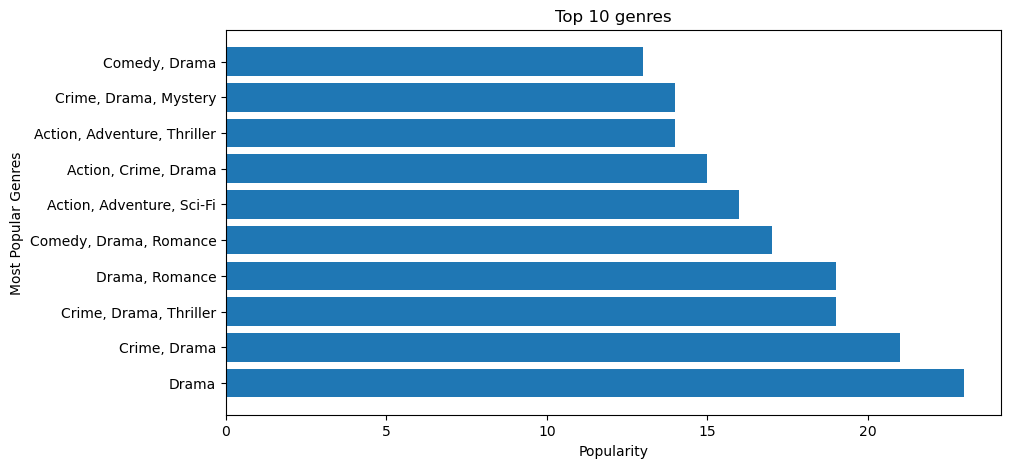

In [183]:
movies = genre[0:10].index
count = list(genre.iloc[:10])

plt.figure(figsize=(10,5))
plt.barh(movies,count)
plt.ylabel("Most Popular Genres")
plt.xlabel("Popularity")
plt.title("Top 10 genres")
plt.show()

In [184]:
df["Directors"].value_counts().head(10)

Directors
Steven Spielberg     12
Martin Scorsese       9
Peter Jackson         8
Quentin Tarantino     8
Christopher Nolan     8
Alfred Hitchcock      7
David Fincher         6
James Cameron         6
Ridley Scott          6
Pedro Almodóvar       5
Name: count, dtype: int64

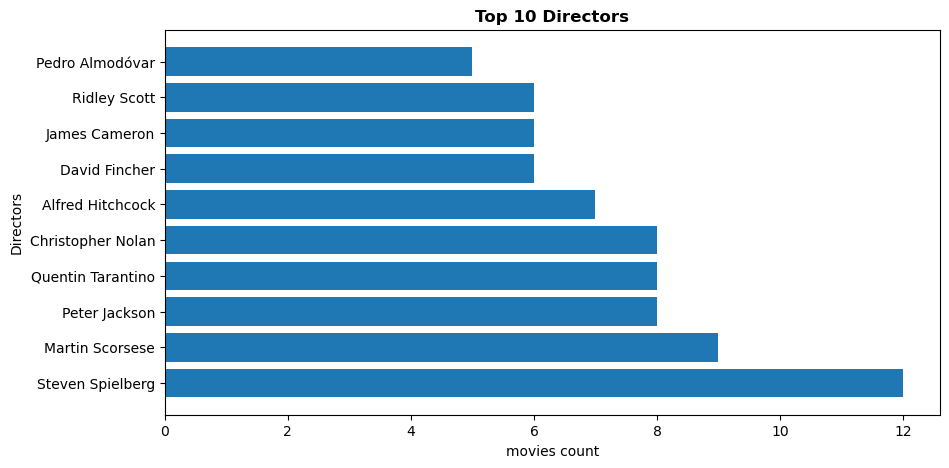

In [185]:
dire=df["Directors"].value_counts().head(10).index
count=df["Directors"].value_counts().head(10).values

plt.figure(figsize=(10,5))
plt.barh(dire,count)
plt.ylabel("Directors")
plt.xlabel("movies count")
plt.title("Top 10 Directors",fontweight ="bold")
plt.show()

C:\Users\PATHAN MUBESHIRA\AppData\Local\Temp\ipykernel_14820\3638296143.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df["Rating"],hue=df["Certificate"])


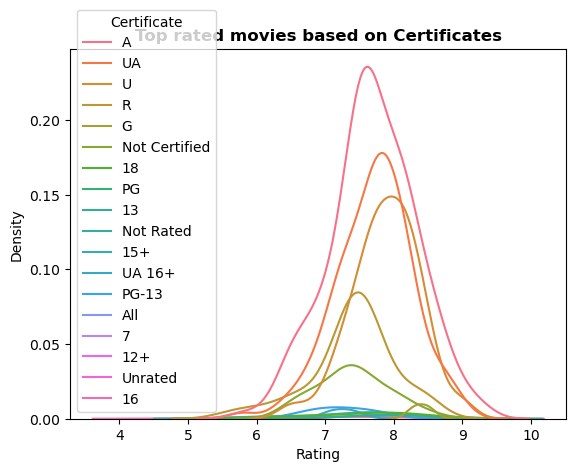

In [186]:
sns.kdeplot(x=df["Rating"],hue=df["Certificate"])
plt.title("Top rated movies based on Certificates",fontweight ="bold")
plt.show()

In [187]:
gr=df.groupby("Gross")["Movie Name"].sum().sort_index(ascending=False).head(20)

In [188]:
gr.sort_index(ascending=False)

Gross
936.66           Star Wars: Episode VII - The Force Awakens
760.51                                               Avatar
659.33                                              Titanic
534.86                                      The Dark Knight
448.14                                The Dark Knight Rises
435.11                           E.T. the Extra-Terrestrial
424.67                      The Hunger Games: Catching Fire
423.32           Pirates of the Caribbean: Dead Man's Chest
422.78                                        The Lion King
408.01                                     The Hunger Games
402.45                                        Jurassic Park
380.84                                         Finding Nemo
380.26         Star Wars: Episode III - Revenge of the Sith
377.85        The Lord of the Rings: The Return of the King
373.59                                         Spider-Man 2
342.55                The Lord of the Rings: The Two Towers
330.25                            

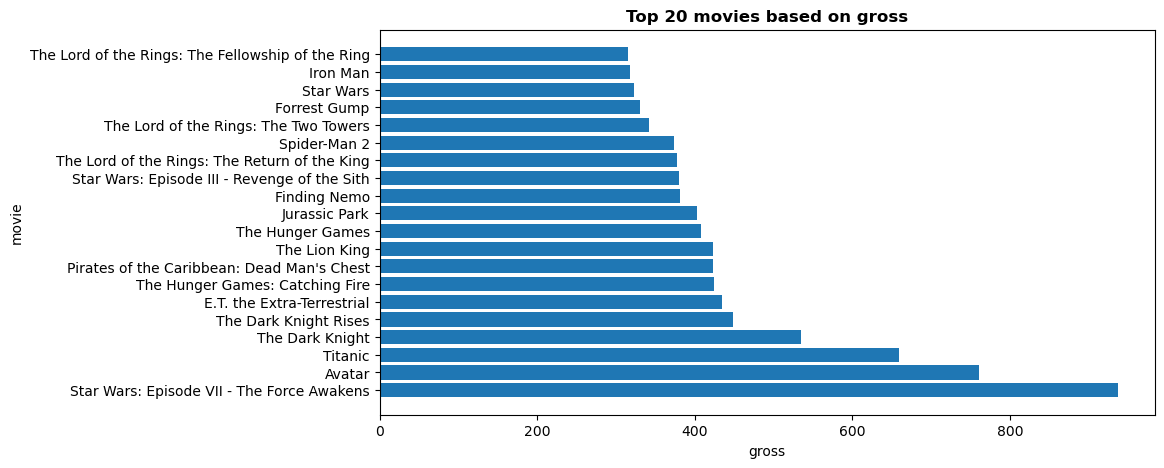

In [189]:
plt.figure(figsize=(10,5))
plt.barh(gr.values,gr.index)
plt.ylabel("movie")
plt.xlabel("gross")
plt.title("Top 20 movies based on gross",fontweight ="bold")
plt.show()

In [190]:
gr1=df.groupby("Gross")["Movie Name"].sum().sort_index(ascending=False).head(5)
gr1

Gross
936.66    Star Wars: Episode VII - The Force Awakens
760.51                                        Avatar
659.33                                       Titanic
534.86                               The Dark Knight
448.14                         The Dark Knight Rises
Name: Movie Name, dtype: object

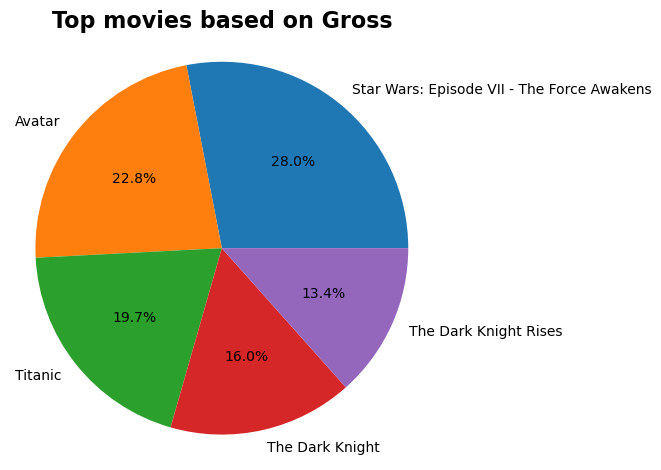

In [191]:
a=gr1.index
b=gr1.values

plt.pie(a,labels=b,autopct="%1.1f%%",radius=1.1,textprops={"fontsize":10})
plt.title('Top movies based on Gross',fontsize=16,fontweight ="bold")
plt.tight_layout()
plt.show()

In [192]:
gr2=df.groupby("Genre")["Metascore"].sum().sort_values(ascending=False).head(5)

In [193]:
a=gr2.index
b=gr2.values
a,b,gr2

(Index(['Drama', 'Crime, Drama', 'Crime, Drama, Thriller',
        'Comedy, Drama, Romance', 'Drama, Romance'],
       dtype='object', name='Genre'),
 array([1807, 1660, 1292, 1269, 1262]),
 Genre
 Drama                     1807
 Crime, Drama              1660
 Crime, Drama, Thriller    1292
 Comedy, Drama, Romance    1269
 Drama, Romance            1262
 Name: Metascore, dtype: int32)

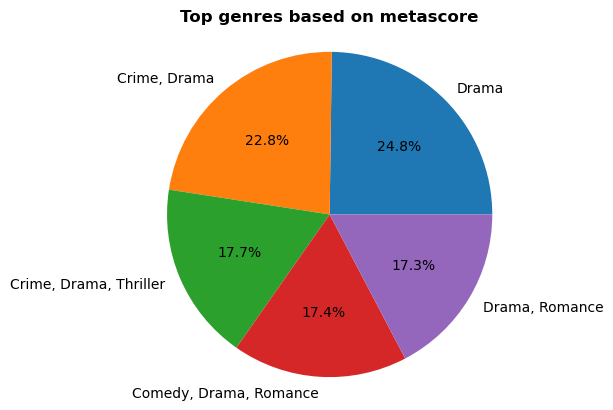

In [194]:
plt.pie(b,labels=a,autopct="%1.1f%%",radius=1.1,textprops={"fontsize":10})
plt.title('Top genres based on metascore',fontsize=12,fontweight ="bold")
plt.show()

In [195]:
df["Certificate"].unique()

array(['A', 'UA', 'U', 'R', 'G', 'Not Certified', '18', 'PG', '13',
       'Not Rated', '15+', 'UA 16+', 'PG-13', 'All', '7', '12+',
       'Unrated', '16'], dtype=object)

In [196]:
df["Certificate"].value_counts()

Certificate
A                171
UA               115
U                 92
R                 51
Not Certified     24
PG-13              5
Not Rated          4
18                 4
13                 2
15+                2
UA 16+             2
G                  2
16                 2
PG                 1
All                1
7                  1
12+                1
Unrated            1
Name: count, dtype: int64

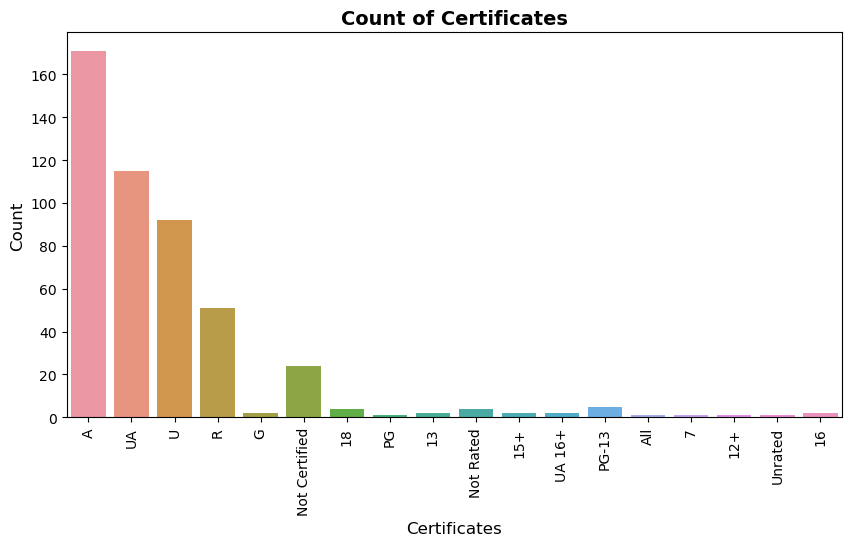

In [197]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Certificate"])
plt.xticks(rotation='vertical')
plt.title('Count of Certificates',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)                 
plt.xlabel('Certificates',fontsize=12)
plt.show()

In [198]:
gr4=df.groupby("Genre")["Votes"].sum().sort_values(ascending=False).head(5)
gr4

Genre
Action, Adventure, Sci-Fi     13419784
Drama                         13049216
Crime, Drama                  12609955
Action, Adventure, Fantasy     9639035
Action, Crime, Drama           8600020
Name: Votes, dtype: int32

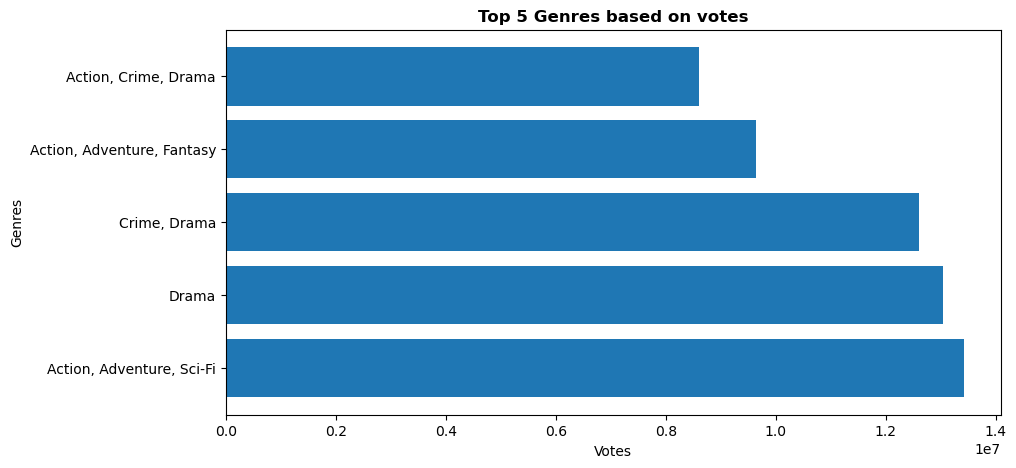

In [201]:
plt.figure(figsize=(10,5))
plt.barh(gr4.index,gr4.values)
plt.ylabel("Genres")
plt.xlabel("Votes")
plt.title("Top 5 Genres based on votes",fontweight ="bold")
plt.show()

In [203]:
gr7=df.groupby("Certificate")["Votes"].sum().sort_values(ascending=False).head()
gr7

Certificate
A     88135636
UA    72655604
U     44982669
R     10525761
18     1840517
Name: Votes, dtype: int32

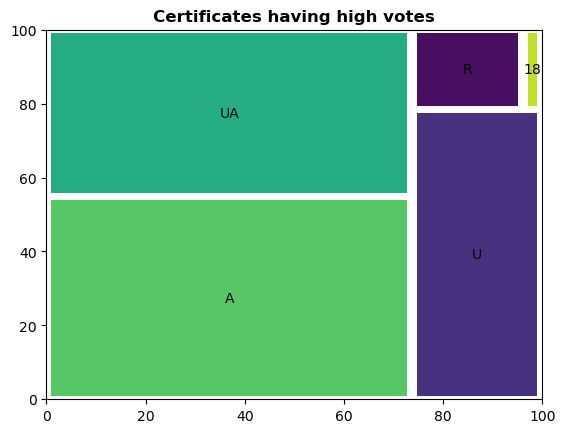

In [206]:
squarify.plot(sizes=gr7.values,label=gr7.index,pad=1)
plt.title("Certificates having high votes",fontweight ="bold")
plt.show()

In [208]:
gr8=df.groupby("Certificate")["Votes"].sum().sort_values(ascending=False).tail(10)
gr8

Certificate
16           771551
12+          757130
PG-13        464022
G            450589
Not Rated    363911
All          333286
UA 16+       324018
7            156854
Unrated       75137
PG            37578
Name: Votes, dtype: int32

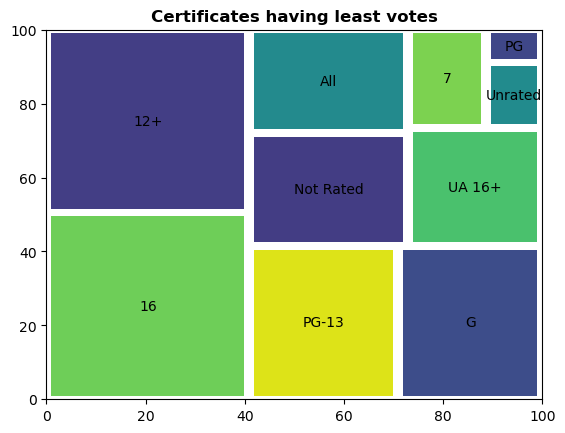

In [209]:
squarify.plot(sizes=gr8.values,label=gr8.index,pad=1)
plt.title("Certificates having least votes",fontweight ="bold")
plt.show()

In [210]:
gr9=df.groupby("Certificate")["Gross"].sum().sort_values(ascending=False).head()
gr9

Certificate
UA               15518.24
A                12195.39
U                11396.56
R                 1048.97
Not Certified      608.89
Name: Gross, dtype: float64

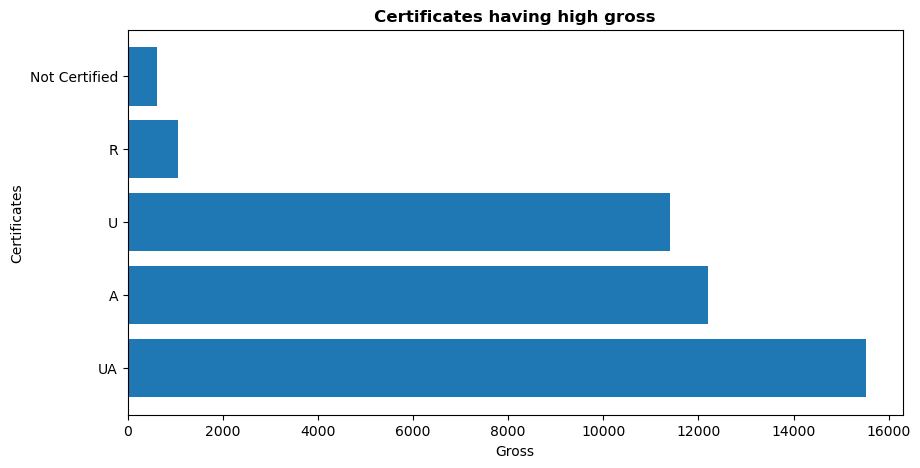

In [211]:
plt.figure(figsize=(10,5))
plt.barh(gr9.index,gr9.values)
plt.xlabel("Gross")
plt.ylabel("Certificates")
plt.title("Certificates having high gross",fontweight ="bold")
plt.show()

In [212]:
df["Release year"].value_counts()

Release year
2000    23
2004    23
2001    23
2005    20
2002    19
        ..
1944     1
1952     1
1941     1
1942     1
1961     1
Name: count, Length: 72, dtype: int64

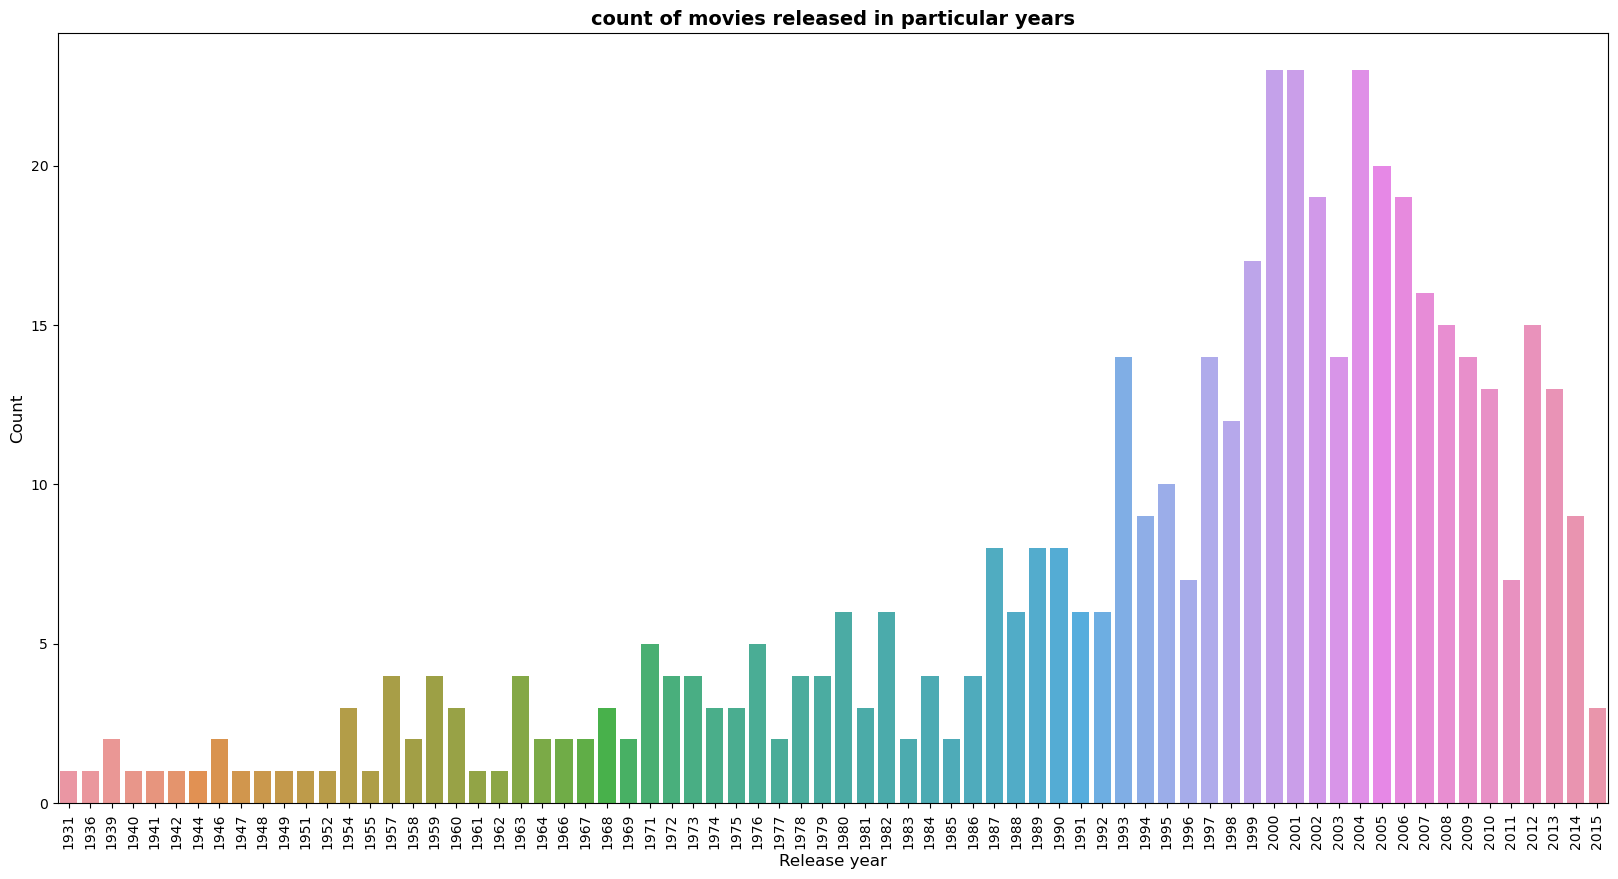

In [227]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Release year"])
plt.xticks(rotation='vertical')
plt.title('count of movies released in particular years',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)                 
plt.xlabel('Release year',fontsize=12)
plt.show()

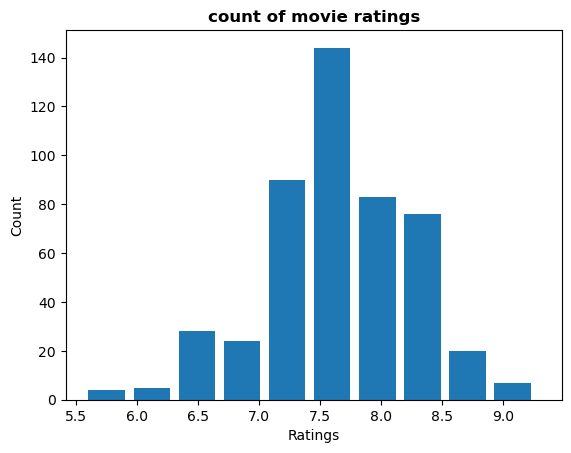

In [228]:
plt.hist(df["Rating"],width=0.3)
plt.title("count of movie ratings",fontweight ="bold")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [229]:
groupd=df.groupby("Directors")["Rating"].sum().sort_values(ascending=False)[:10]
groupd

Directors
Steven Spielberg     96.2
Martin Scorsese      72.2
Christopher Nolan    67.2
Quentin Tarantino    64.8
Peter Jackson        64.4
Alfred Hitchcock     57.0
James Cameron        48.4
David Fincher        48.4
Ridley Scott         48.2
Robert Zemeckis      39.5
Name: Rating, dtype: float64

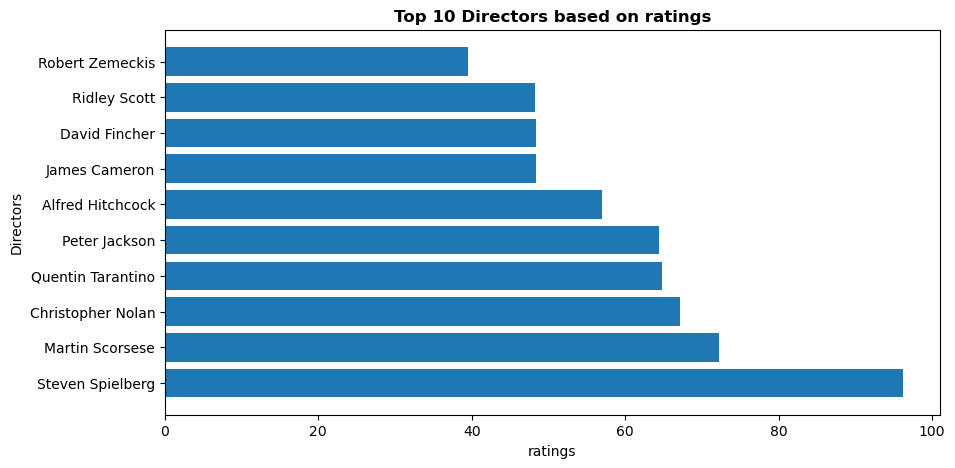

In [230]:
plt.figure(figsize=(10,5))
plt.barh(groupd.index,groupd.values)
plt.ylabel("Directors")
plt.xlabel("ratings")
plt.title("Top 10 Directors based on ratings",fontweight ="bold")
plt.show()

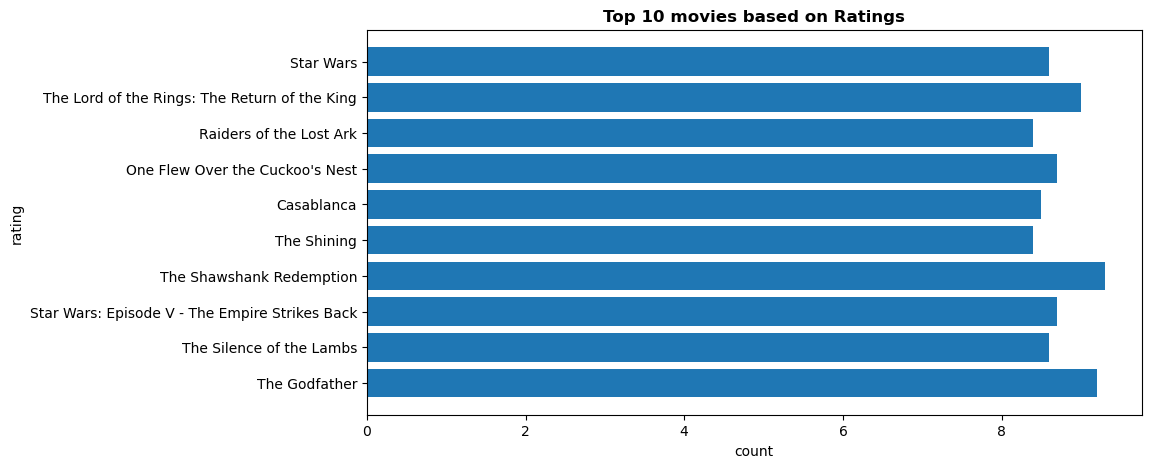

In [231]:
rate=df["Rating"].head(10).values
movie=df["Movie Name"].head(10)

plt.figure(figsize=(10,5))
plt.barh(movie,rate)
plt.ylabel("rating")
plt.xlabel("count")
plt.title("Top 10 movies based on Ratings",fontweight ="bold")
plt.show()

In [232]:
gr3=df.groupby("Genre")["Rating"].sum().sort_values(ascending=False).head(5)
gr3

Genre
Drama                     185.1
Crime, Drama              168.9
Crime, Drama, Thriller    145.5
Drama, Romance            141.0
Comedy, Drama, Romance    129.4
Name: Rating, dtype: float64

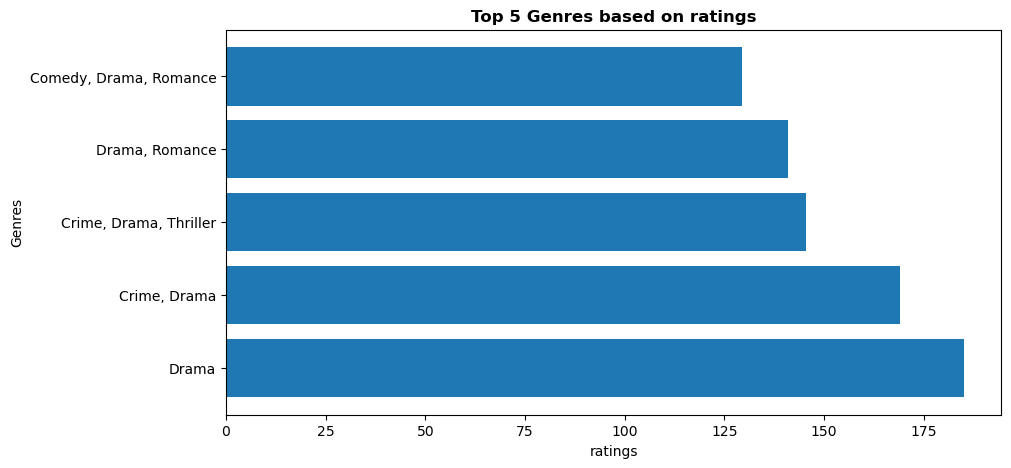

In [233]:
plt.figure(figsize=(10,5))
plt.barh(gr3.index,gr3.values)
plt.ylabel("Genres")
plt.xlabel("ratings")
plt.title("Top 5 Genres based on ratings",fontweight ="bold")
plt.show()

In [234]:
gr5=df.groupby("Certificate")["Rating"].sum().sort_values(ascending=False).head()
gr5

Certificate
A                1316.1
UA                886.9
U                 725.4
R                 377.4
Not Certified     177.6
Name: Rating, dtype: float64

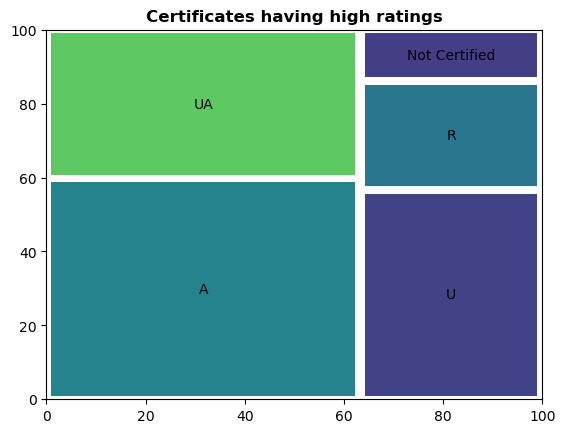

In [235]:
squarify.plot(sizes=gr5.values,label=gr5.index,pad=1)
plt.title("Certificates having high ratings",fontweight ="bold")
plt.show()

In [236]:
gr6=df.groupby("Certificate")["Rating"].sum().sort_values(ascending=False).tail(10)
gr6

Certificate
G          16.8
13         16.1
15+        15.9
UA 16+     14.5
16         13.8
7           8.0
PG          7.8
Unrated     7.6
All         7.6
12+         7.4
Name: Rating, dtype: float64

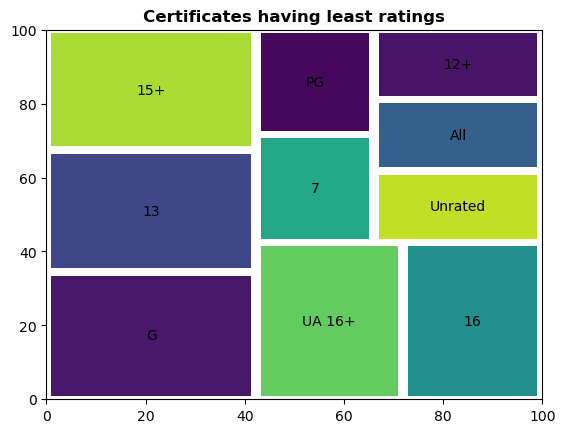

In [237]:
squarify.plot(sizes=gr6.values,label=gr6.index,pad=1)
plt.title("Certificates having least ratings",fontweight ="bold")
plt.show()

In [238]:
df["Runtime"].value_counts()

Runtime
127    16
120    12
102    12
101    12
124    11
       ..
179     1
195     1
202     1
201     1
187     1
Name: count, Length: 103, dtype: int64

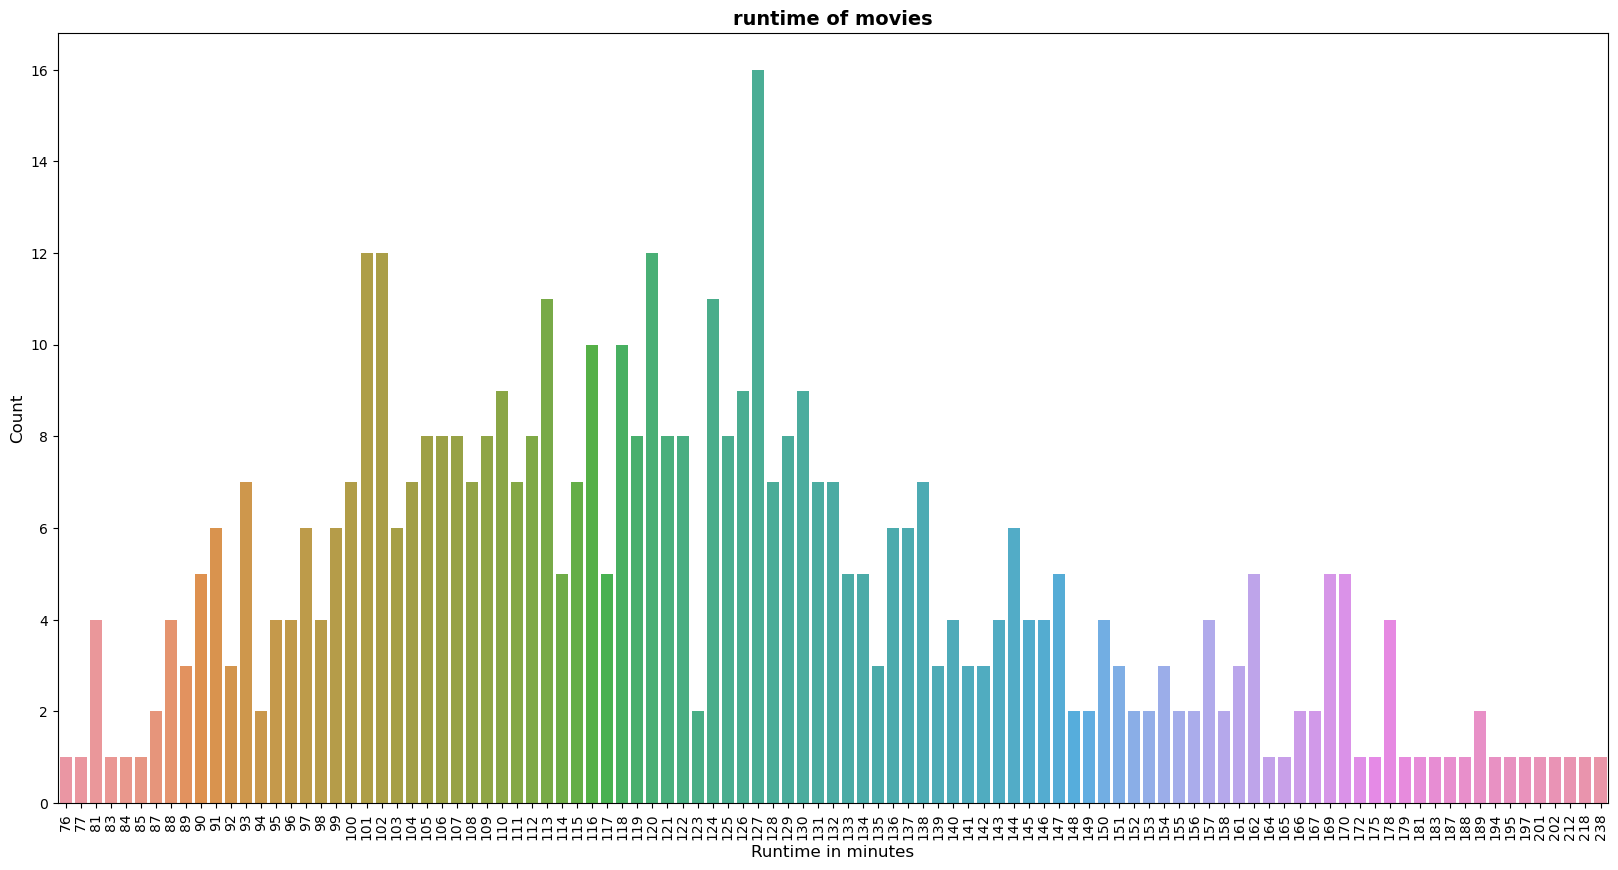

In [239]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Runtime"])
plt.xticks(rotation='vertical')
plt.title('runtime of movies',fontsize=14, fontweight ="bold")
plt.ylabel('Count',fontsize=12)                 
plt.xlabel('Runtime in minutes',fontsize=12)
plt.show()